<a href="https://colab.research.google.com/github/SmaranSatapathy/Credit-Card-Fraud-Detection/blob/main/Fraud_Card_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.0986

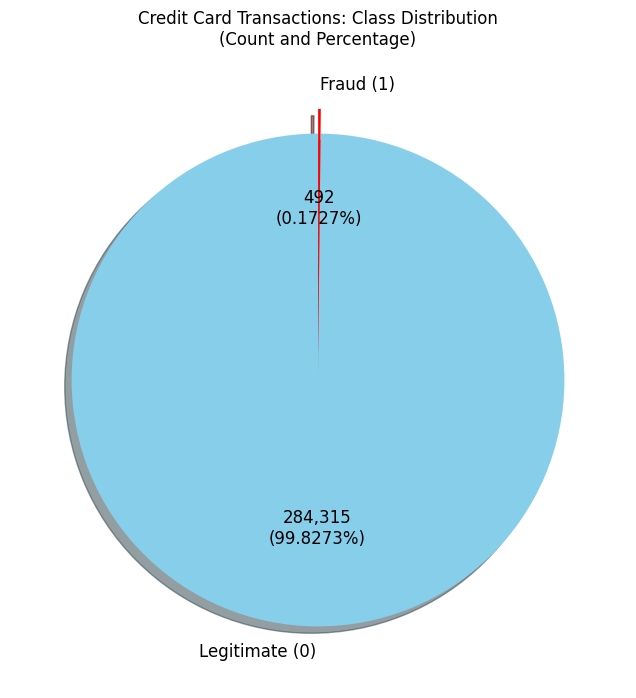


IT IS AN UNBALANCED DATASET
as minority class is less than 20% of the whole dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DLWmjrprj/creditcard.csv')

# Print dataset info
print(df)
print(df.info)
print(df.describe)

#show if there null value somewhere

print(df.isnull().sum())
print()

# Print column names
print(df.columns)
print()

# Get class counts and percentages
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100


majority_percent = class_percent[0]
minority_percent = class_percent[1]



# Display important info amd Create the pie chart
print("Credit Card Fraud Dataset - Class Distribution Analysis")
print("="*60)
print(f"Total transactions: {len(df):,}")
print("\nClass counts:")
print(class_counts)
print("\nClass percentages:")
print(class_percent)
print(f"\nLegitimate transactions (Class 0): ",majority_percent,"%")
print(f"Fraudulent transactions (Class 1): ",minority_percent,"%")


plt.figure(figsize=(8, 8))
plt.pie(class_counts,
        labels=['Legitimate (0)', 'Fraud (1)'],
        autopct=lambda p: f'{int(p/100*sum(class_counts)):,}\n({p:.4f}%)',
        colors=['skyblue', 'red'],
        startangle=90,
        explode=(0, 0.1),
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Credit Card Transactions: Class Distribution\n(Count and Percentage)',
          pad=20, fontsize=12)
plt.show()

#Checking if the dataset is imbalance or not:
#if minority class is less than 20% of data
if minority_percent < 0.2*100:
  print("\nIT IS AN UNBALANCED DATASET")
  print("as minority class is less than 20% of the whole dataset")
else:
  print("\nIT IS NOT A BALANCED DATASET")
  print("as minority class is more than equal to 20% of the whole dataset")


[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]
AFTER USING SMOTE:
Total transactions:  37906

Updated Class counts:
Class
0    23691
1    14215
Name: count, dtype: int64

Updated Class percentages:
Class
0    62.49934
1    37.50066
Name: proportion, dtype: float64

Legitimate transactions (Class 0):  62.49934047380362 %
Fraudulent transactions (Class 1):  37.50065952619638 %


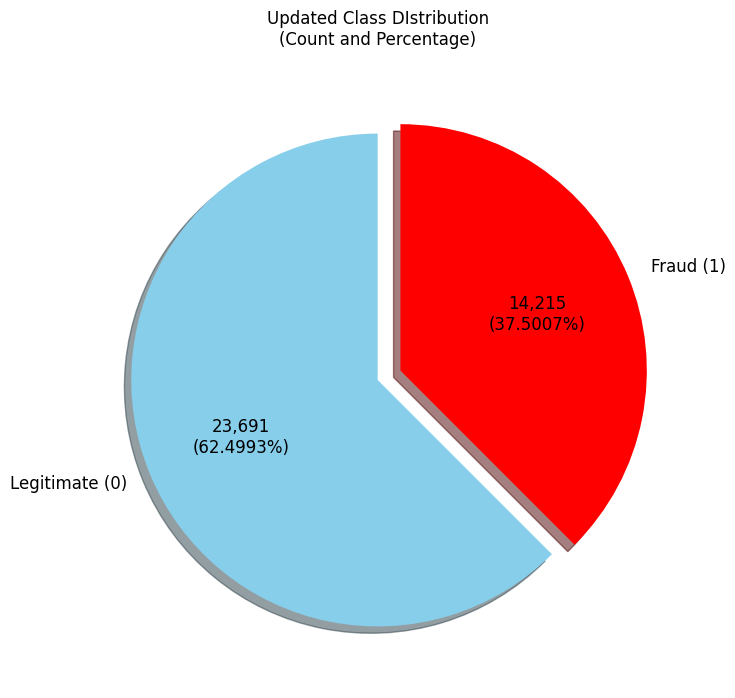


IT IS A BALANCED DATASET
as minority class is more than equal to 20% of the whole dataset


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize the features
scaler = StandardScaler()
scaler.fit(X)          # Only calculates mean and std
X_scaled = scaler.transform(X)  # Now actually scales the data
print(X_scaled)
smote = SMOTE(sampling_strategy=0.05,random_state=42)
Xn_resampled, yn_resampled = smote.fit_resample(X_scaled, y)
rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = rus.fit_resample(Xn_resampled, yn_resampled)
print("AFTER USING SMOTE:")
print("="*80)

# Check the class distribution
new_class_counts=y_resampled.value_counts()
new_class_percent =y_resampled.value_counts(normalize=True) * 100
new_majority_percent = new_class_percent[0]
new_minority_percent = new_class_percent[1]


print("Total transactions: ",len(y_resampled))
print("\nUpdated Class counts:")
print(new_class_counts)
print("\nUpdated Class percentages:")
print(new_class_percent)
print(f"\nLegitimate transactions (Class 0): ",new_majority_percent,"%")
print(f"Fraudulent transactions (Class 1): ",new_minority_percent,"%")

plt.figure(figsize=(8, 8))
plt.pie(new_class_counts,
        labels=['Legitimate (0)', 'Fraud (1)'],
        autopct=lambda p: f'{int(p/100*sum(new_class_counts)):,}\n({p:.4f}%)',
        colors=['skyblue', 'red'],
        startangle=90,
        explode=(0, 0.1),
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Updated Class DIstribution\n(Count and Percentage)',
          pad=20, fontsize=12)
plt.show()

#Checking if the dataset is imbalance or not:
#if minority class is less than 20% of data
if new_minority_percent < 0.2*100:
  print("\nIT IS AN UNBALANCED DATASET")
  print("as minority class is less than 20% of the whole dataset")
else:
  print("\nIT IS A BALANCED DATASET")
  print("as minority class is more than equal to 20% of the whole dataset")



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

x=X_resampled
y=y_resampled

# y=tf.keras.utils.to_categorical(y,num_classes=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)
# x_train,x_test=x_train/255.0,x_test/255.0
def create_model(optimizer, hidden_activation):
    model = Sequential([
        Dense(64, input_dim=X.shape[1], activation=hidden_activation),
        Dropout(0.5),
        Dense(32, activation=hidden_activation),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc'),
                         tf.keras.metrics.F1Score(name='f1')])
    return model
def create_model_both(optimizer):
    model = Sequential([
        Dense(64, input_dim=X.shape[1], activation="relu"),
        Dropout(0.5),
        Dense(32, activation="tanh"),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc'),
                         tf.keras.metrics.F1Score(name='f1')])
    return model

e=20
# SGD + ReLU
sgd_relu_training_acc = []
sgd_relu_validation_acc = []
sgd_relu_training_loss = []
sgd_relu_validation_loss = []
model_sgd_relu=create_model(optimizer="sgd",hidden_activation="relu")
for i in range(1,e+1):
      history=model_sgd_relu.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
      sgd_relu_training_acc.append(history.history['accuracy'][0])
      sgd_relu_validation_acc.append(history.history['val_accuracy'][0])
      sgd_relu_training_loss.append(history.history['loss'][0])
      sgd_relu_validation_loss.append(history.history['val_loss'][0])

# ADAM + ReLU
adam_relu_training_acc = []
adam_relu_validation_acc = []
adam_relu_training_loss = []
adam_relu_validation_loss = []
model_adam_relu=create_model(optimizer="adam",hidden_activation="relu")
for i in range(1,e+1):
      history=model_adam_relu.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
      adam_relu_training_acc.append(history.history['accuracy'][0])
      adam_relu_validation_acc.append(history.history['val_accuracy'][0])
      adam_relu_training_loss.append(history.history['loss'][0])
      adam_relu_validation_loss.append(history.history['val_loss'][0])

# RMSProp + ReLU
rmsp_relu_training_acc = []
rmsp_relu_validation_acc = []
rmsp_relu_training_loss = []
rmsp_relu_validation_loss = []
model_rmsp_relu=create_model(optimizer="rmsprop",hidden_activation="relu")
for i in range(1,e+1):
  history=model_rmsp_relu.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  rmsp_relu_training_acc.append(history.history['accuracy'][0])
  rmsp_relu_validation_acc.append(history.history['val_accuracy'][0])
  rmsp_relu_training_loss.append(history.history['loss'][0])
  rmsp_relu_validation_loss.append(history.history['val_loss'][0])

# SGD + Tanh
sgd_tanh_training_acc = []
sgd_tanh_validation_acc = []
sgd_tanh_training_loss = []
sgd_tanh_validation_loss = []
model_sgd_tanh=create_model(optimizer="sgd",hidden_activation="tanh")
for i in range(1,e+1):
  history=model_sgd_tanh.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  sgd_tanh_training_acc.append(history.history['accuracy'][0])
  sgd_tanh_validation_acc.append(history.history['val_accuracy'][0])
  sgd_tanh_training_loss.append(history.history['loss'][0])
  sgd_tanh_validation_loss.append(history.history['val_loss'][0])

# ADAM + Tanh
adam_tanh_training_acc = []
adam_tanh_validation_acc = []
adam_tanh_training_loss = []
adam_tanh_validation_loss = []
model_adam_tanh=create_model(optimizer="adam",hidden_activation="tanh")
for i in range(1,e+1):
  history=model_adam_tanh.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  adam_tanh_training_acc.append(history.history['accuracy'][0])
  adam_tanh_validation_acc.append(history.history['val_accuracy'][0])
  adam_tanh_training_loss.append(history.history['loss'][0])
  adam_tanh_validation_loss.append(history.history['val_loss'][0])

# RMSProp + Tanh
rmsp_tanh_training_acc = []
rmsp_tanh_validation_acc = []
rmsp_tanh_training_loss = []
rmsp_tanh_validation_loss = []
model_rmsp_tanh=create_model(optimizer="rmsprop",hidden_activation="tanh")
for i in range(1,e+1):
  history=model_rmsp_tanh.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  rmsp_tanh_training_acc.append(history.history['accuracy'][0])
  rmsp_tanh_validation_acc.append(history.history['val_accuracy'][0])
  rmsp_tanh_training_loss.append(history.history['loss'][0])
  rmsp_tanh_validation_loss.append(history.history['val_loss'][0])

# SGD with both relu and tanh
sgd_both_training_acc = []
sgd_both_validation_acc = []
sgd_both_training_loss = []
sgd_both_validation_loss = []
model_sgd_both=create_model_both(optimizer="sgd")
for i in range(1,e+1):
  history=model_sgd_both.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  sgd_both_training_acc.append(history.history['accuracy'][0])
  sgd_both_validation_acc.append(history.history['val_accuracy'][0])
  sgd_both_training_loss.append(history.history['loss'][0])
  sgd_both_validation_loss.append(history.history['val_loss'][0])

# ADAM with both relu and tanh
adam_both_training_acc = []
adam_both_validation_acc = []
adam_both_training_loss = []
adam_both_validation_loss = []
model_adam_both=create_model_both(optimizer="sgd")
for i in range(1,e+1):
  history=model_adam_both.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  adam_both_training_acc.append(history.history['accuracy'][0])
  adam_both_validation_acc.append(history.history['val_accuracy'][0])
  adam_both_training_loss.append(history.history['loss'][0])
  adam_both_validation_loss.append(history.history['val_loss'][0])

# RMSProp with both relu and tanh
rmsp_both_training_acc = []
rmsp_both_validation_acc = []
rmsp_both_training_loss = []
rmsp_both_validation_loss = []
model_rmsp_both=create_model_both(optimizer="rmsprop")
for i in range(1,e+1):
  history=model_rmsp_both.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),verbose=1)
  rmsp_both_training_acc.append(history.history['accuracy'][0])
  rmsp_both_validation_acc.append(history.history['val_accuracy'][0])
  rmsp_both_training_loss.append(history.history['loss'][0])
  rmsp_both_validation_loss.append(history.history['val_loss'][0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7333 - auc: 0.8413 - f1: 0.5505 - loss: 0.5572 - precision: 0.6282 - recall: 0.8045 - val_accuracy: 0.9438 - val_auc: 0.9638 - val_f1: 0.5453 - val_loss: 0.2058 - val_precision: 0.9873 - val_recall: 0.8613
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9159 - auc: 0.9374 - f1: 0.5468 - loss: 0.2689 - precision: 0.9351 - recall: 0.8344 - val_accuracy: 0.9468 - val_auc: 0.9746 - val_f1: 0.5453 - val_loss: 0.1618 - val_precision: 0.9852 - val_recall: 0.8711
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - auc: 0.9522 - f1: 0.5449 - loss: 0.2194 - precision: 0.9641 - recall: 0.8501 - val_accuracy: 0.9488 - val_auc: 0.9816 - val_f1: 0.5453 - val_loss: 0.1448 - val_precision: 0.9844 - val_recall: 0.8774
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9405 - auc: 0.9648 - f1: 0.5425 - loss: 0.1880 - precision: 0.9674 - recall: 0.8695 - val_accuracy: 0.9493 - val_auc: 0.9866 - val_f1: 0.5453 - val_loss: 0.1336 -

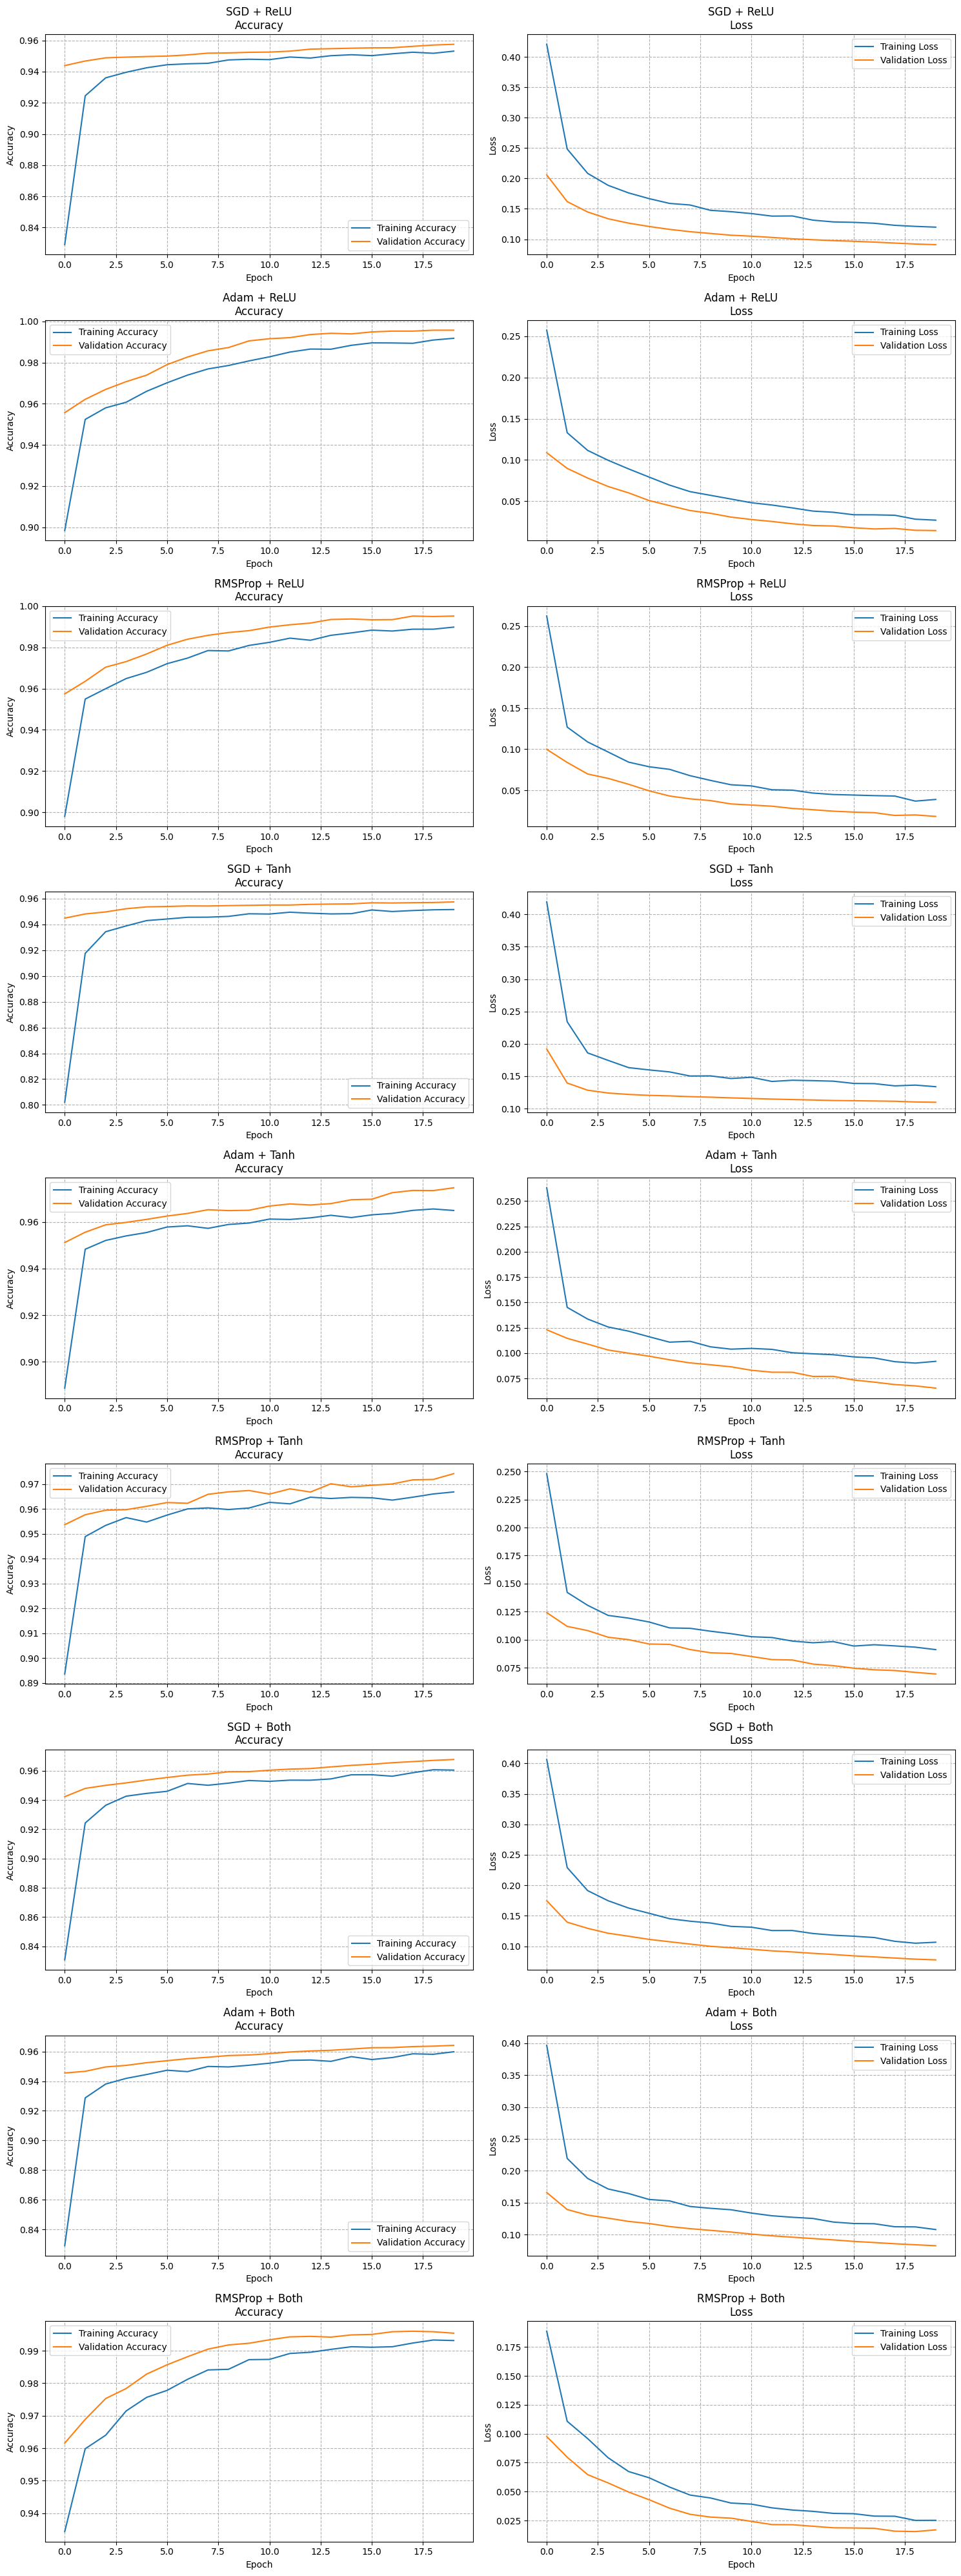

In [ ]:
plt.figure(figsize=(15, 40))
# Plot training/validation accuracy for sgd+relu
plt.subplot(9, 2, 1)
plt.plot(sgd_relu_training_acc, label='Training Accuracy')
plt.plot(sgd_relu_validation_acc, label='Validation Accuracy')
plt.title("SGD + ReLU\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for sgd+relu
plt.subplot(9, 2, 2)
plt.plot(sgd_relu_training_loss, label='Training Loss')
plt.plot(sgd_relu_validation_loss, label='Validation Loss')
plt.title("SGD + ReLU\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for adam+relu
plt.subplot(9, 2, 3)
plt.plot(adam_relu_training_acc, label='Training Accuracy')
plt.plot(adam_relu_validation_acc, label='Validation Accuracy')
plt.title("Adam + ReLU\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for adam+relu
plt.subplot(9, 2, 4)
plt.plot(adam_relu_training_loss, label='Training Loss')
plt.plot(adam_relu_validation_loss, label='Validation Loss')
plt.title("Adam + ReLU\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for rmsp+relu
plt.subplot(9, 2, 5)
plt.plot(rmsp_relu_training_acc, label='Training Accuracy')
plt.plot(rmsp_relu_validation_acc, label='Validation Accuracy')
plt.title("RMSProp + ReLU\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for rmsp+relu
plt.subplot(9, 2, 6)
plt.plot(rmsp_relu_training_loss, label='Training Loss')
plt.plot(rmsp_relu_validation_loss, label='Validation Loss')
plt.title("RMSProp + ReLU\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for sgd+tanh
plt.subplot(9, 2, 7)
plt.plot(sgd_tanh_training_acc, label='Training Accuracy')
plt.plot(sgd_tanh_validation_acc, label='Validation Accuracy')
plt.title("SGD + Tanh\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for sgd+tanh
plt.subplot(9, 2, 8)
plt.plot(sgd_tanh_training_loss, label='Training Loss')
plt.plot(sgd_tanh_validation_loss, label='Validation Loss')
plt.title("SGD + Tanh\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for adam+tanh
plt.subplot(9, 2, 9)
plt.plot(adam_tanh_training_acc, label='Training Accuracy')
plt.plot(adam_tanh_validation_acc, label='Validation Accuracy')
plt.title("Adam + Tanh\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for adam+tanh
plt.subplot(9, 2, 10)
plt.plot(adam_tanh_training_loss, label='Training Loss')
plt.plot(adam_tanh_validation_loss, label='Validation Loss')
plt.title("Adam + Tanh\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for rmsp+tanh
plt.subplot(9, 2, 11)
plt.plot(rmsp_tanh_training_acc, label='Training Accuracy')
plt.plot(rmsp_tanh_validation_acc, label='Validation Accuracy')
plt.title("RMSProp + Tanh\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for rmsp+tanh
plt.subplot(9, 2, 12)
plt.plot(rmsp_tanh_training_loss, label='Training Loss')
plt.plot(rmsp_tanh_validation_loss, label='Validation Loss')
plt.title("RMSProp + Tanh\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for sgd+both
plt.subplot(9, 2, 13)
plt.plot(sgd_both_training_acc, label='Training Accuracy')
plt.plot(sgd_both_validation_acc, label='Validation Accuracy')
plt.title("SGD + Both\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for sgd+both
plt.subplot(9, 2, 14)
plt.plot(sgd_both_training_loss, label='Training Loss')
plt.plot(sgd_both_validation_loss, label='Validation Loss')
plt.title("SGD + Both\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for adam+both
plt.subplot(9, 2, 15)
plt.plot(adam_both_training_acc, label='Training Accuracy')
plt.plot(adam_both_validation_acc, label='Validation Accuracy')
plt.title("Adam + Both\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for adam+both
plt.subplot(9, 2, 16)
plt.plot(adam_both_training_loss, label='Training Loss')
plt.plot(adam_both_validation_loss, label='Validation Loss')
plt.title("Adam + Both\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

# Plot training/validation accuracy for rmsp+both
plt.subplot(9, 2, 17)
plt.plot(rmsp_both_training_acc, label='Training Accuracy')
plt.plot(rmsp_both_validation_acc, label='Validation Accuracy')
plt.title("RMSProp + Both\nAccuracy")
plt.grid(linestyle="--",alpha=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training/validation loss for rmsp+both
plt.subplot(9, 2, 18)
plt.plot(rmsp_both_training_loss, label='Training Loss')
plt.plot(rmsp_both_validation_loss, label='Validation Loss')
plt.title("RMSProp + Both\nLoss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle="--",alpha=1)
plt.legend()

plt.tight_layout()
plt.show()



415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


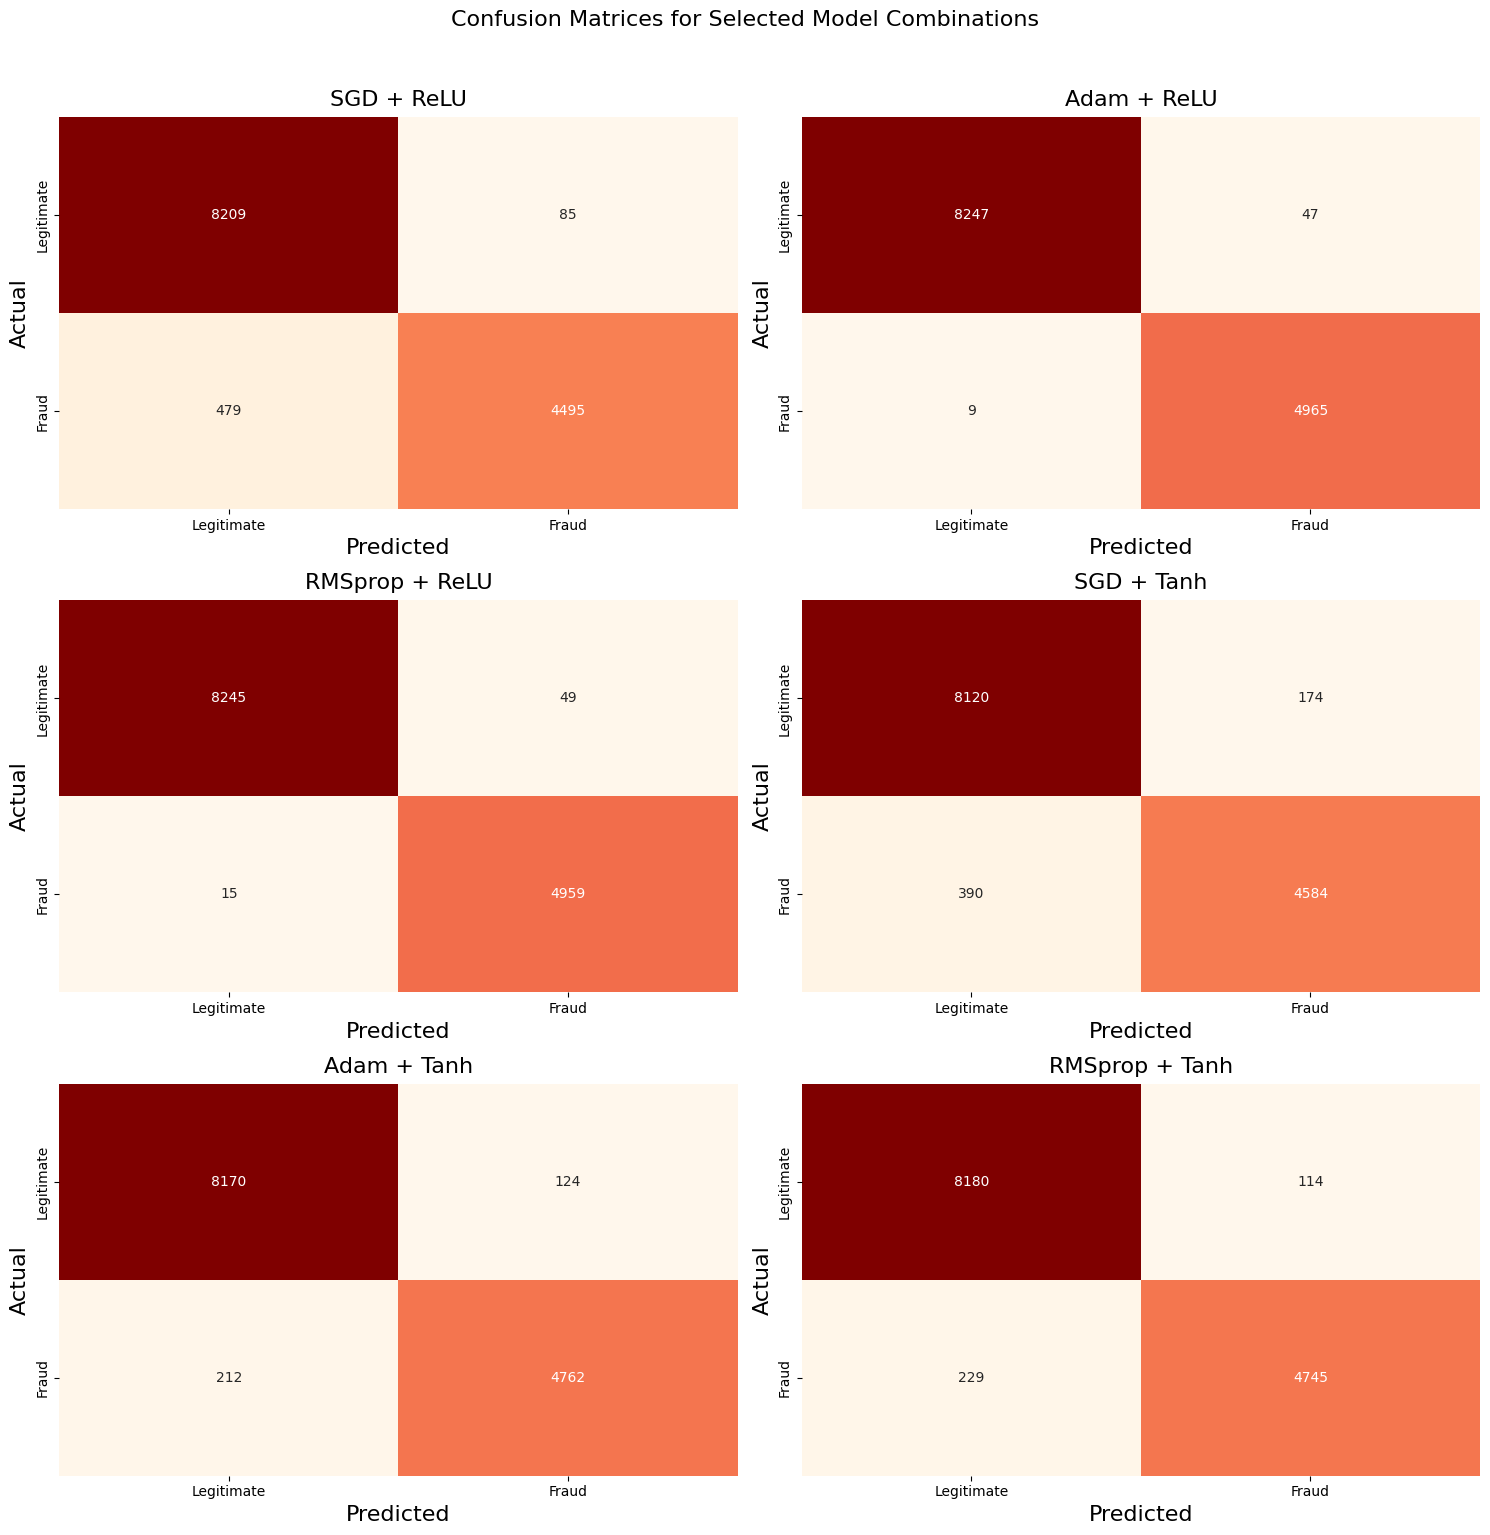

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dictionary of all trained models
models = {
    "SGD + ReLU": model_sgd_relu,
    "Adam + ReLU": model_adam_relu,
    "RMSprop + ReLU": model_rmsp_relu,
    "SGD + Tanh": model_sgd_tanh,
    "Adam + Tanh": model_adam_tanh,
    "RMSprop + Tanh": model_rmsp_tanh,
    "SGD + Both": model_sgd_both,
    "Adam + Both": model_adam_both,
    "RMSprop + Both": model_rmsp_both
}

# Set up the figure
plt.figure(figsize=(15, 15))
plt.suptitle("Confusion Matrices for Selected Model Combinations", fontsize=16, y=1.02) # Changed title

# Create subplots in a 3x2 grid
# Limit the loop to the first 6 models for a 3x2 grid
for i, (name, model) in enumerate(list(models.items())[:6], 1): # Take only the first 6 items
    ax = plt.subplot(3, 2, i) # Use a 3x2 grid

    # Get predictions
    y_pred = (model.predict(x_test) > 0.5).astype(int)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'],
                cbar=False, ax=ax)

    ax.set_title(name, pad=8, fontsize=16)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

# Dictionary of all trained models
models = {
    "SGD + ReLU": model_sgd_relu,
    "Adam + ReLU": model_adam_relu,
    "RMSprop + ReLU": model_rmsp_relu,
    "SGD + Tanh": model_sgd_tanh,
    "Adam + Tanh": model_adam_tanh,
    "RMSprop + Tanh": model_rmsp_tanh,
    "SGD + Both": model_sgd_both,
    "Adam + Both": model_adam_both,
    "RMSprop + Both": model_rmsp_both
}

def generate_report(model, x_test, y_test,acc,pre,rcl,aucl,f1):

    # Get predictions
    y_pred = (model.predict(x_test) > 0.5).astype(int)

    # Calculate metrics
    accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    precision = model.evaluate(x_test, y_test, verbose=0)[2]
    recall = model.evaluate(x_test, y_test, verbose=0)[3]
    auc = roc_auc_score(y_test, model.predict(x_test).ravel())
    f1_score = model.evaluate(x_test, y_test, verbose=0)[4]

    # Generate classification report
    report = classification_report(y_test, y_pred, digits=4)
    acc.append(accuracy)
    pre.append(precision)
    rcl.append(recall)
    aucl.append(auc)
    f1.append(f1_score)
    return accuracy, precision, recall, auc,f1_score, report,acc,pre,rcl,aucl,f1

acc=[]
pre=[]
rcl=[]
aucl=[]
f1=[]
# Generate and print reports for all models
for name, model in models.items():
    accuracy, precision, recall, auc , f1_score ,report,acc,pre,rcl,aucl,f1 = generate_report(model, x_test, y_test,acc,pre,rcl,aucl,f1)

    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}, F1_score: {f1_score:.4f} ")
    print("Classification Report:")
    print(report)
    print("\n" + "="*80 + "\n")

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
SGD + ReLU:
Accuracy: 0.9575, Precision: 0.9814, Recall: 0.9037, AUC: 0.9949, F1_score: 0.9947 
Classification Report:
              precision    recall  f1-score   support

           0     0.9449    0.9898    0.9668      8294
           1     0.9814    0.9037    0.9410      4974

    accuracy                         0.9575     13268
   macro avg     0.9632    0.9467    0.9539     13268
weighted avg     0.9586    0.9575    0.9571     13268



415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Adam + ReLU:
Accuracy: 0.9958, Precision: 0.9906, Recall: 0.9982, AUC: 0.9998, F1_score: 0.9998 
Classification Report:
              precision    recall  f1-score   support

           0     0.9989    0.9943    0.9966      8294
           1     0.9906    0.9982    0.9944      4974

    accuracy                         0.9958     13268
   macro avg     0.9948    0.9963    0.9955     

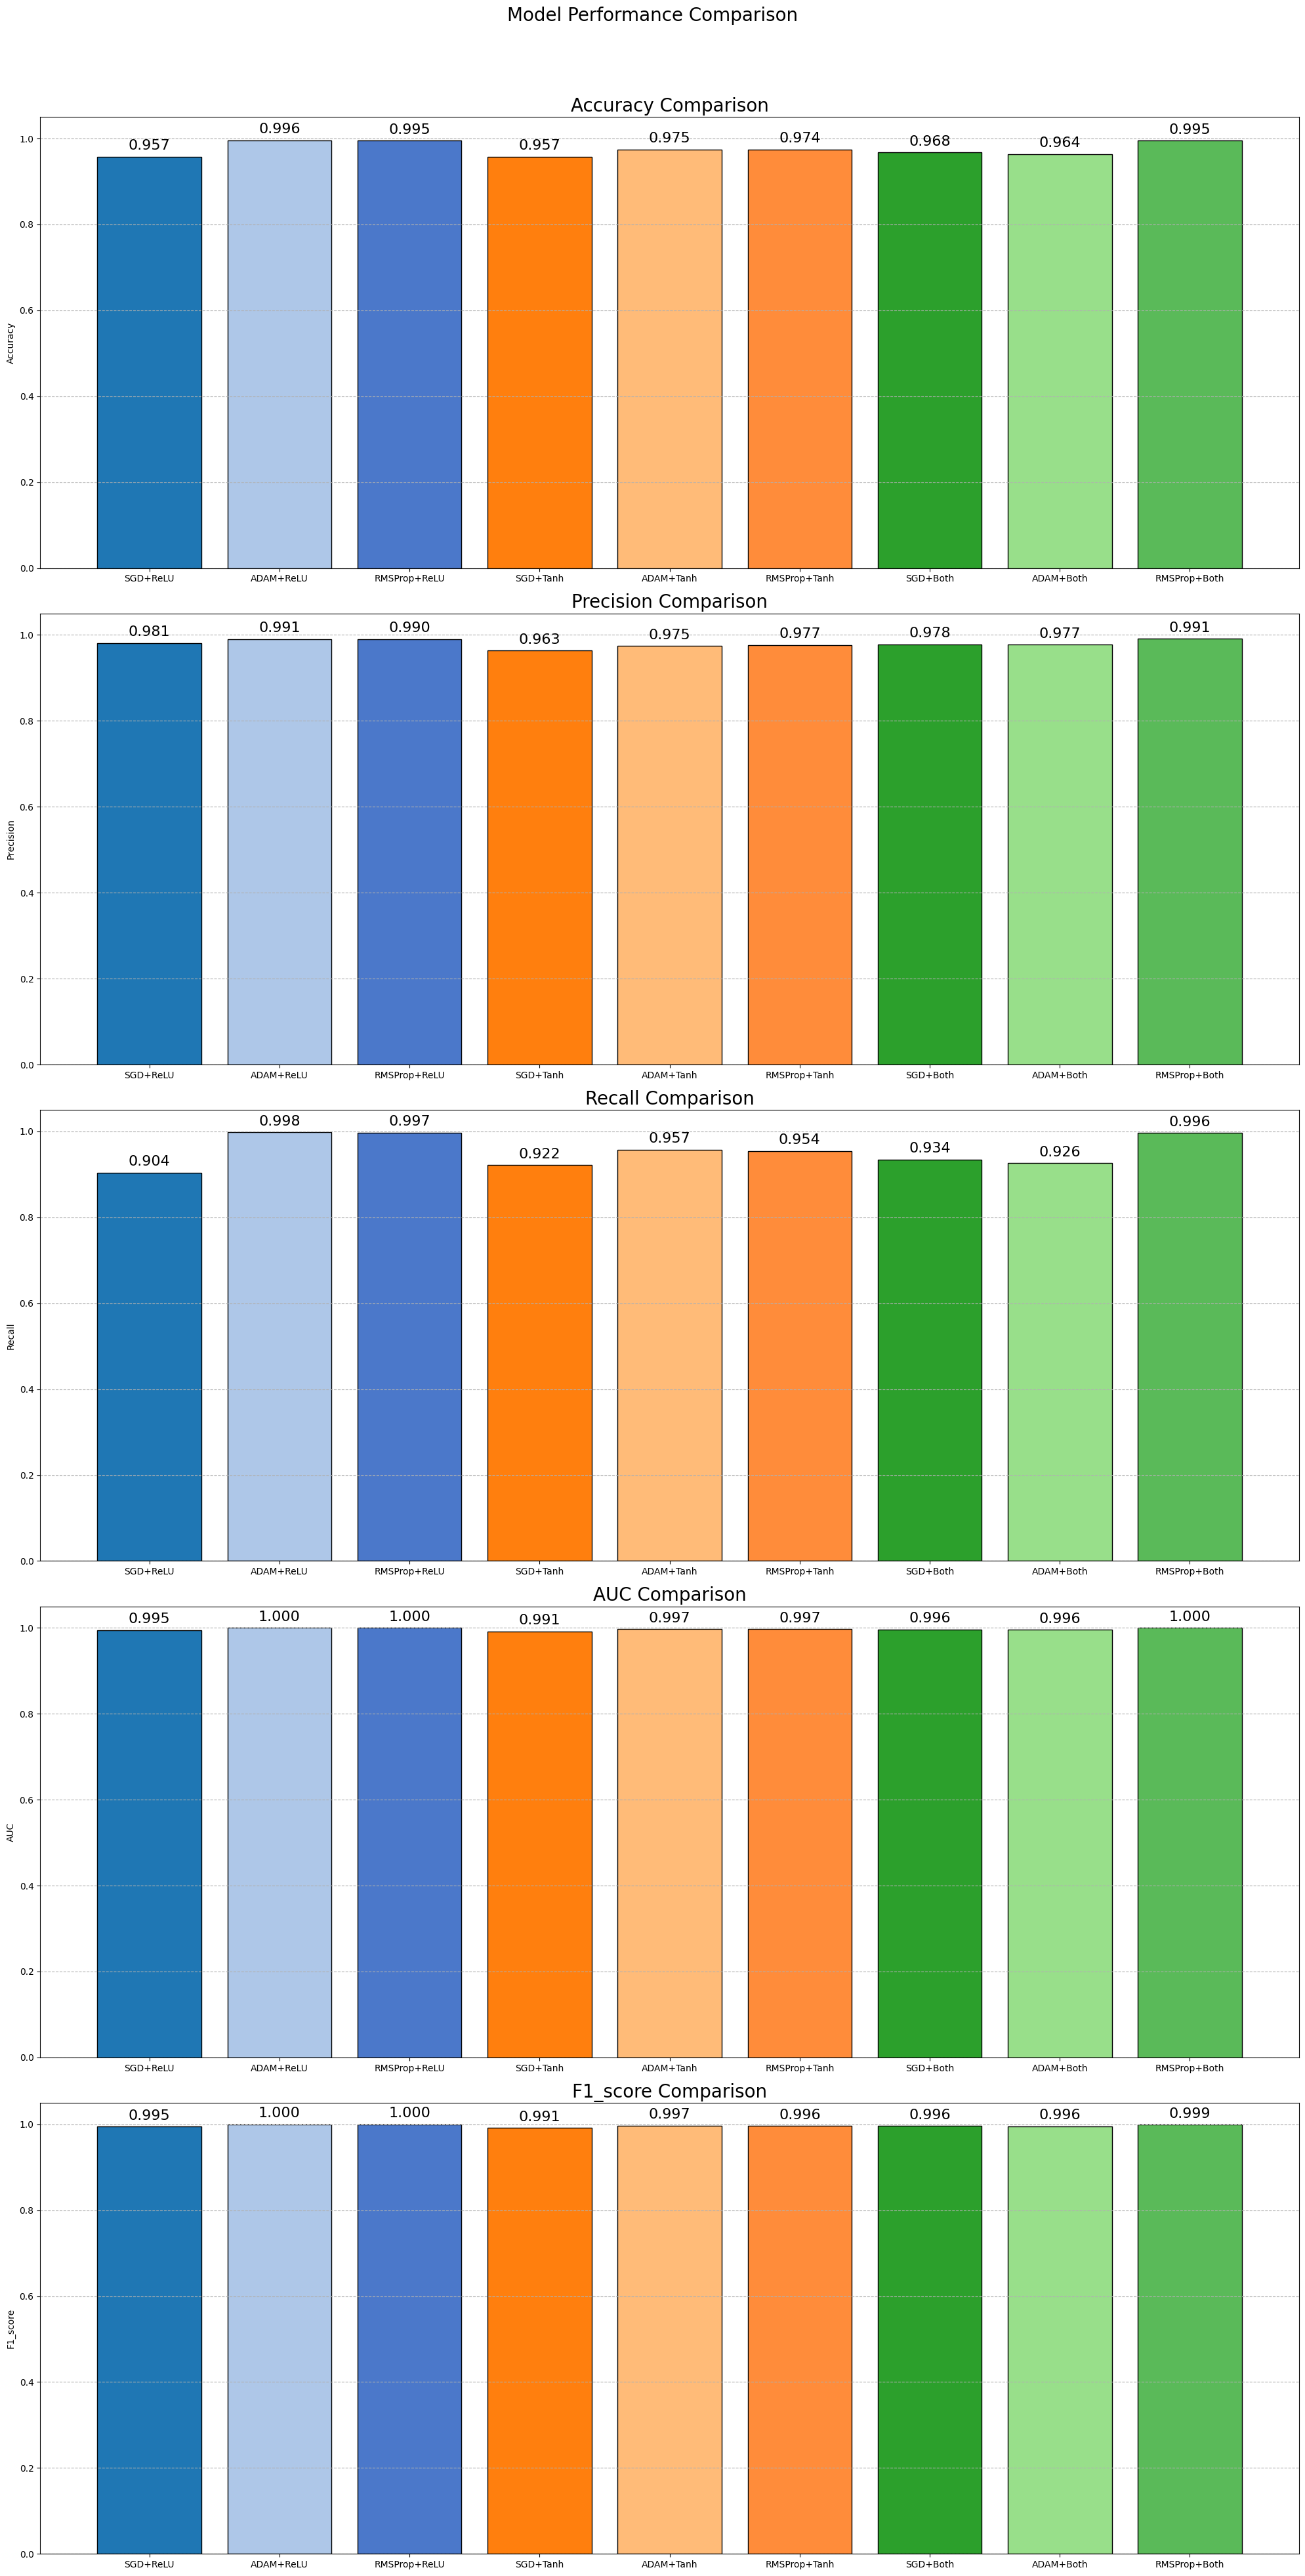

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated these metrics and stored them in variables
# like sgd_relu_accuracy, adam_relu_precision, etc.

# Model configurations
models = ['SGD+ReLU', 'ADAM+ReLU', 'RMSProp+ReLU',
          'SGD+Tanh', 'ADAM+Tanh', 'RMSProp+Tanh',
          'SGD+Both', 'ADAM+Both', 'RMSProp+Both']

# Metrics dictionary
metrics = {
    'Accuracy': acc,
    'Precision': pre,
    'Recall':rcl,
    'AUC': aucl,
    'F1_score':f1
}

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(20,40))  # 5 rows, 1 column
plt.subplots_adjust(hspace=0.8)
fig.suptitle('Model Performance Comparison', fontsize=20)

# Color scheme
colors = ['#1f77b4', '#aec7e8', '#4b78ca',  # Blues for ReLU
          '#ff7f0e', '#ffbb78', '#ff8c3a',  # Oranges for Tanh
          '#2ca02c', '#98df8a', '#5aba59']  # Greens for Both

# Iterate through metrics and plot
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    # Access the correct subplot using a single index
    ax = axes[i]

    bars = ax.bar(models, metric_values, color=colors, edgecolor='black')
    ax.set_title(f'{metric_name} Comparison', fontsize=20)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0, 1.05)  # Adjust as needed
    ax.grid(axis='y', linestyle='--', alpha=1)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=16,alpha=1)

# Adjust layout

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to prevent title overlap
plt.show()

415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


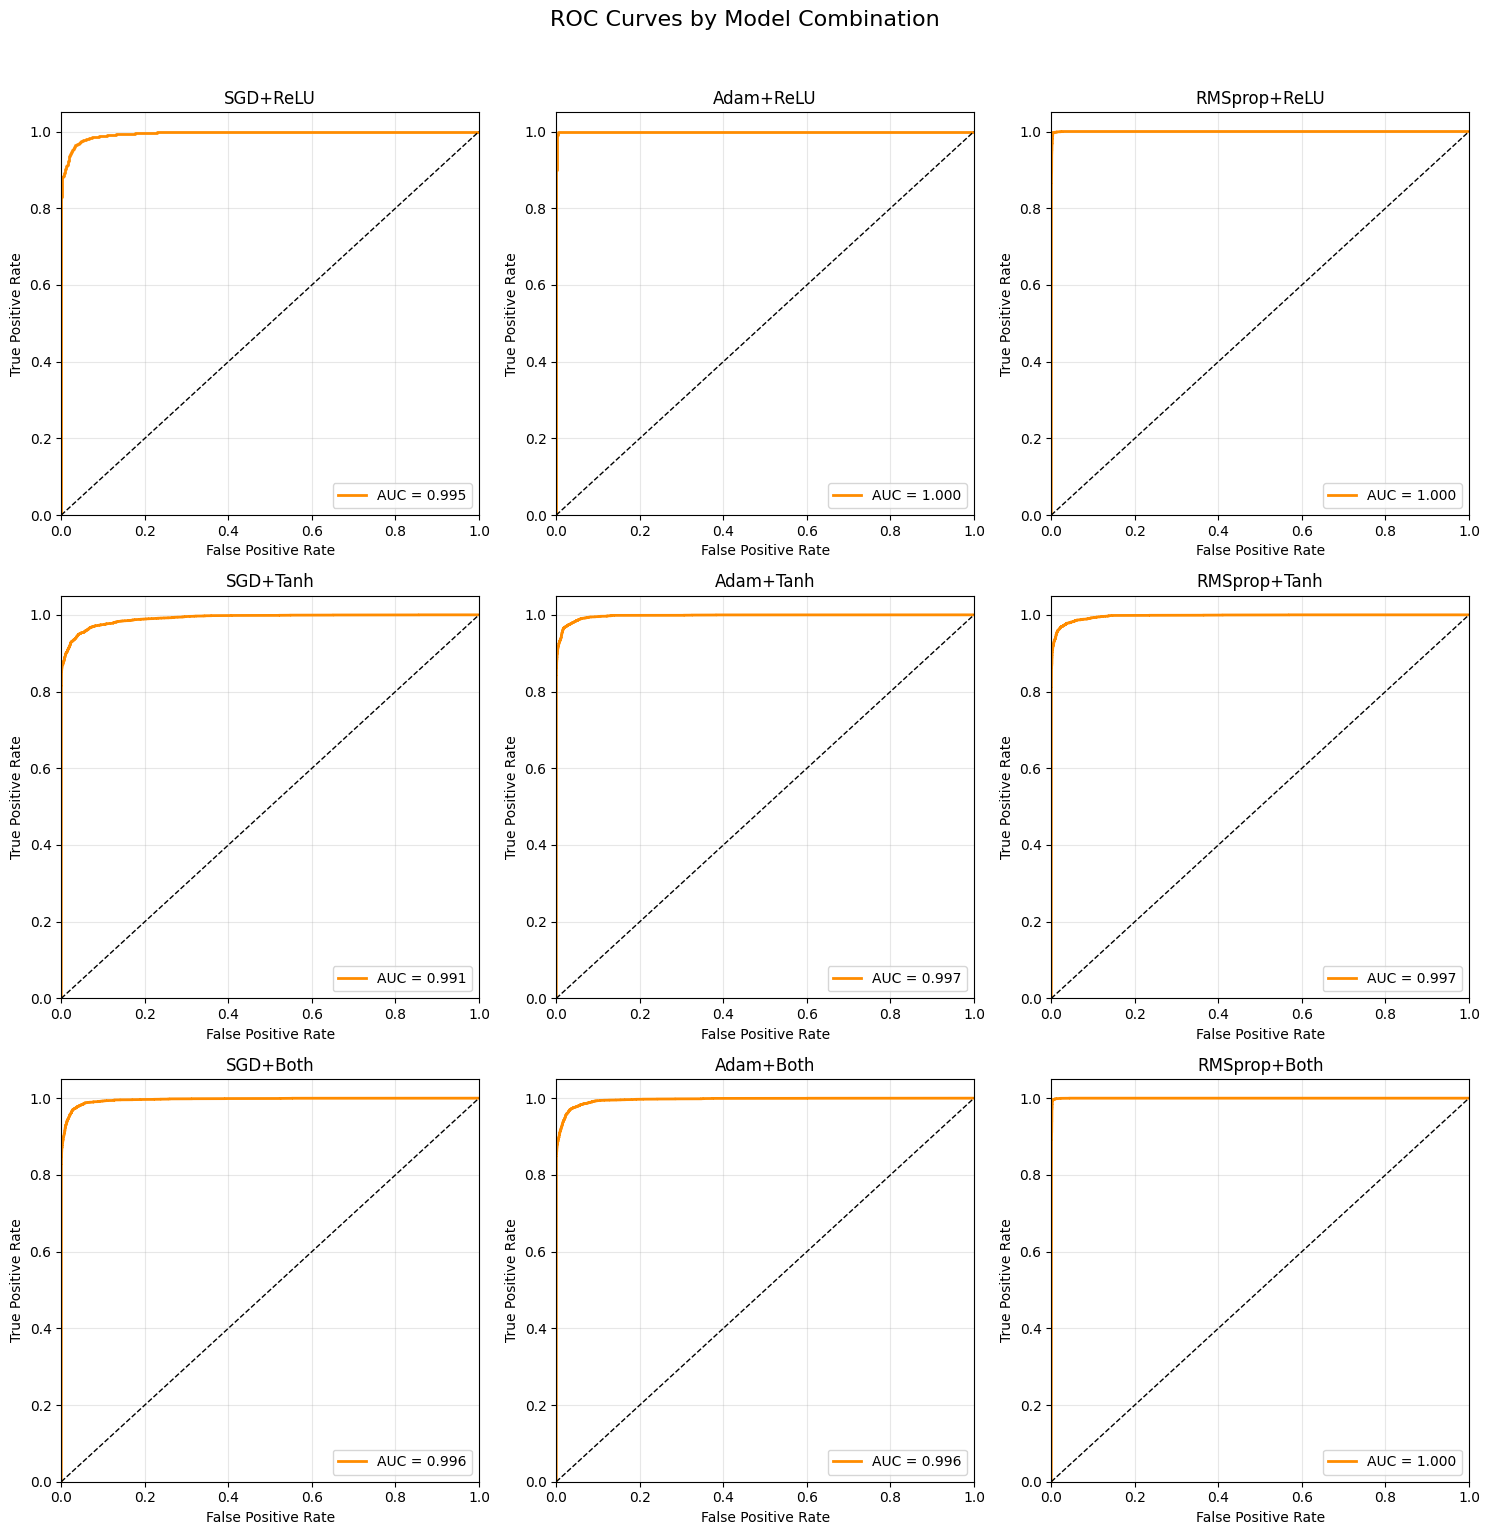

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


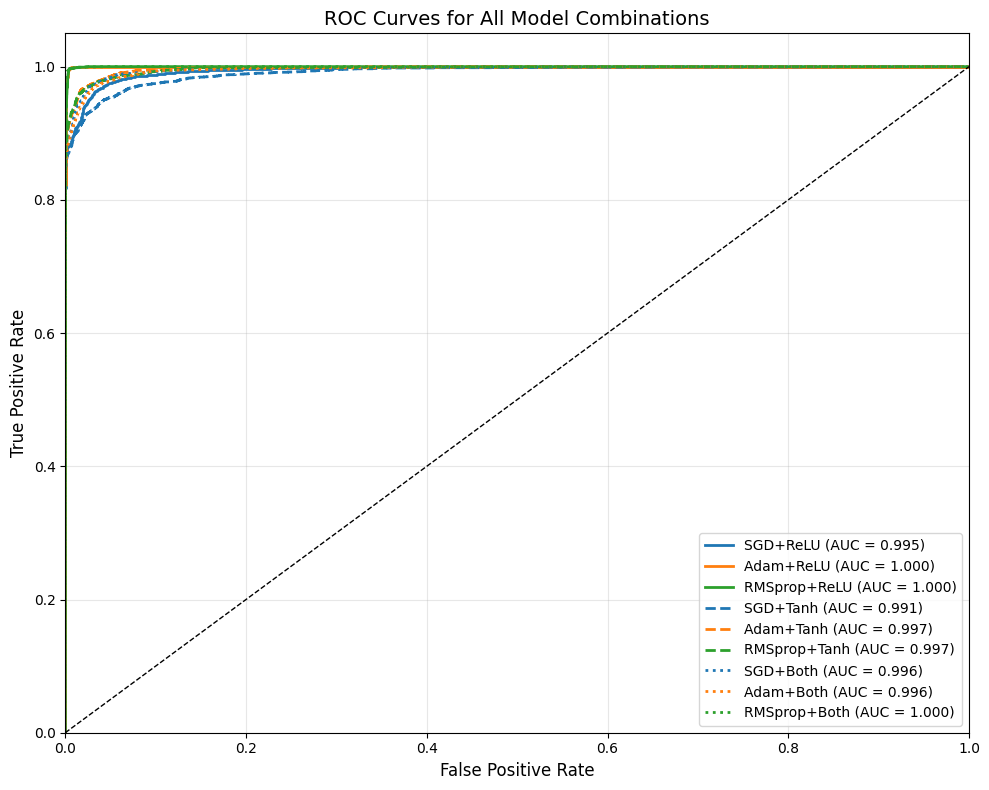

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# List all model combinations
model_combinations = {
    'SGD+ReLU': model_sgd_relu,
    'Adam+ReLU': model_adam_relu,
    'RMSprop+ReLU': model_rmsp_relu,
    'SGD+Tanh': model_sgd_tanh,
    'Adam+Tanh': model_adam_tanh,
    'RMSprop+Tanh': model_rmsp_tanh,
    'SGD+Both': model_sgd_both,
    'Adam+Both': model_adam_both,
    'RMSprop+Both': model_rmsp_both
}

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('ROC Curves by Model Combination', fontsize=16, y=1.02)

for (name, model), ax in zip(model_combinations.items(), axes.ravel()):
    y_pred_prob = model.predict(x_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Set up the figure
plt.figure(figsize=(10, 8))

# Define colors for each optimizer
optimizer_colors = {
    'SGD': '#1f77b4',  # Blue
    'Adam': '#ff7f0e',  # Orange
    'RMSprop': '#2ca02c'  # Green
}

# Plot ROC curve for each model
for name, model in model_combinations.items():
    optimizer, activation = name.split('+')

    # Get predicted probabilities
    y_pred_prob = model.predict(x_test).ravel()

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot with different line styles for activations
    linestyle = '-' if activation == 'ReLU' else '--' if activation == 'Tanh' else ':'

    plt.plot(fpr, tpr,
             color=optimizer_colors[optimizer],
             linestyle=linestyle,
             lw=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot random classifier line

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Model Combinations', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()